In [5]:
import sys
sys.path.append("../")
from src.magpie_perception import realsense_wrapper as real
import numpy as np
from PIL import Image

rsc = real.RealSense(device_name='D405')
rsc.initConnection()


In [6]:
p, rgbd_image = rsc.getPCD()
image = np.array(rgbd_image.color)
image = Image.fromarray(image)

In [1]:
import sys
sys.path.append("../")
from magpie_perception.label_owlvit import LabelOWLViT
# from src.magpie_perception.label_owlvit import LabelOWLViT
# from perception.label_owlv2 import LabelOWLv2
# path = "google/owlvit-base-patch32"
label_vit = LabelOWLViT(topk=3)
# label_vit = LabelOWLv2(topk=3)

2024-09-25 15:07:33.819272: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 15:07:33.819330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 15:07:33.924821: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 15:07:34.126807: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 15:07:35.627181: W tensorflow/compiler/tf2

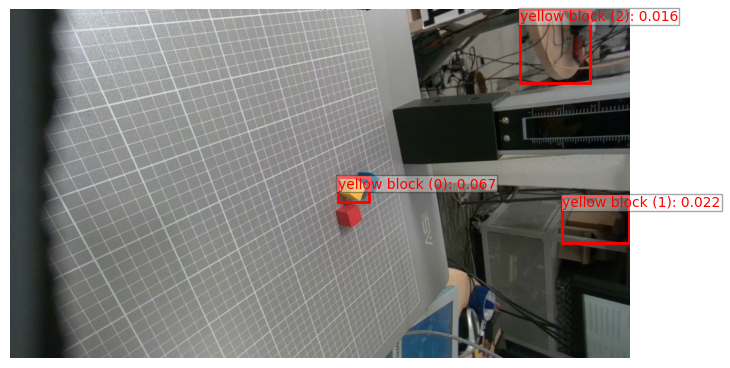

In [7]:
import numpy as np
from PIL import Image
# image = Image.open("test.jpg").convert("RGB")
label_vit.set_threshold(0.001)
image = np.array(image)
queries = ["a photo of a yellow block"]
abbrevq = ["yellow block"]
results, boxes, scores, labels = label_vit.label(image, queries, abbrevq, plot=True, topk=True)
